# Passos para a análise de dados:
#### - compreender o problema dos dados 
#### - importar e inspecionar os dados
#### - Tratar dados ausentes
#### - Explorar as características dos dados
#### - Realizar transformações dos dados
#### - Tratar outliers
#### - Comunicar descobertas e insights


In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Importar e inspecionar

In [54]:
cancer_df = pd.read_csv('_cancer_dataset_uae.csv')

cancer_df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [55]:
#checkar a dimensão da base de dados
cancer_df.shape

(10000, 20)

In [56]:
#Checkar os nomes e os tipos de dados das colunas
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [57]:
cancer_df['Comorbidities'] = cancer_df['Comorbidities'].replace(np.nan, 'None')
cancer_df['Death_Date'] = cancer_df['Death_Date'].replace(np.nan, 'None')
cancer_df['Cause_of_Death'] = cancer_df['Cause_of_Death'].replace(np.nan, 'None')

In [58]:
# Vamos checkar se existem valores nulos na base de dados
cancer_df.isnull().sum()

Patient_ID              0
Age                     0
Gender                  0
Nationality             0
Emirate                 0
Diagnosis_Date          0
Cancer_Type             0
Cancer_Stage            0
Treatment_Type          0
Treatment_Start_Date    0
Hospital                0
Primary_Physician       0
Outcome                 0
Death_Date              0
Cause_of_Death          0
Smoking_Status          0
Comorbidities           0
Ethnicity               0
Weight                  0
Height                  0
dtype: int64

In [59]:
#Checkar se há valores duplicados na base de dados
cancer_df.duplicated().sum()

np.int64(0)

## Converter tipos de dados

In [60]:
import datetime as dt

#converter colunas de data para datetime
cancer_df['Diagnosis_Date'] = pd.to_datetime(cancer_df['Diagnosis_Date'])
cancer_df['Treatment_Start_Date'] = pd.to_datetime(cancer_df['Treatment_Start_Date'])

In [61]:
# ver as colunas tratadas com  datetime
cancer_df[['Diagnosis_Date', 'Treatment_Start_Date']]

,Diagnosis_Date,Treatment_Start_Date
0,2020-11-30,2020-12-04
1,2015-10-10,2015-11-05
2,2018-02-13,2018-08-03
3,2022-02-04,2022-03-13
4,2019-12-03,2020-02-29
...,...,...
9995,2016-01-21,2016-04-03
9996,2018-12-06,2019-03-23
9997,2016-06-11,2016-10-21
9998,2018-11-12,2019-02-05


In [62]:
cancer_df[['Diagnosis_Date', 'Treatment_Start_Date']].dtypes

Diagnosis_Date          datetime64[ns]
Treatment_Start_Date    datetime64[ns]
dtype: object

In [63]:
print(cancer_df['Age'].describe())


#vamos criar um instervalo de idade em categorias
min_age = cancer_df['Age'].min()
twenty_fifth = cancer_df['Age'].quantile(0.25)
median = cancer_df['Age'].median()
seventy_fifth = cancer_df['Age'].quantile(0.75)
maximum = cancer_df['Age'].max()

#cirar rotulos e faixas de idade por categorias de idade

labels = ['young_adult', 'middle_aged', 'older_adult', 'elderlies']
bins = [min_age, twenty_fifth, median, seventy_fifth, maximum]

# Criar uma coluna de categorias de idade
cancer_df['Age_Category'] = pd.cut(cancer_df['Age'], labels=labels, bins=bins)


count    10000.000000
mean        53.539700
std         20.757324
min         18.000000
25%         36.000000
50%         53.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64


In [64]:
cancer_df[['Age', 'Age_Category']].head()

,Age,Age_Category
0,69,older_adult
1,32,young_adult
2,89,elderlies
3,78,elderlies
4,38,middle_aged


### Vamos verificar e resolver inconsistências

In [65]:
for x in cancer_df.columns:
    print(cancer_df[x].unique())


#Não há inconsistências nos dados

['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]
['Female' 'Male' 'Other']
['Emirati' 'Expatriate']
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']
<DatetimeArray>
['2020-11-30 00:00:00', '2015-10-10 00:00:00', '2018-02-13 00:00:00',
 '2022-02-04 00:00:00', '2019-12-03 00:00:00', '2015-02-10 00:00:00',
 '2023-02-27 00:00:00', '2018-04-05 00:00:00', '2022-12-12 00:00:00',
 '2018-05-29 00:00:00',
 ...
 '2018-01-18 00:00:00', '2020-12-30 00:00:00', '2020-12-15 00:00:00',
 '2018-10-05 00:00:00', '2020-07-25 00:00:00', '2018-05-14 00:00:00',
 '2016-06-09 00:00:00', '2019-06-21 00:00:00', '2022-09-18 00:00:00',
 '2016-06-11 00:00:00']
Length: 3151, dtype: datetime64[ns]
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 

In [66]:
#Análise estatística das colunas categóricas

cancer_df.select_dtypes(include='object').describe()

,Patient_ID,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,3,2,7,8,4,4,4,8614,3,868,3,3,4,5
top,PAT009984,Female,Emirati,Ajman,Leukemia,III,Radiation,Sheikh Khalifa Hospital,Dr. AJ25,Recovered,None,None,Non-Smoker,None,South Asian
freq,1,4985,5920,1497,1314,3041,2519,2541,5,4931,9008,9008,5038,4047,2083


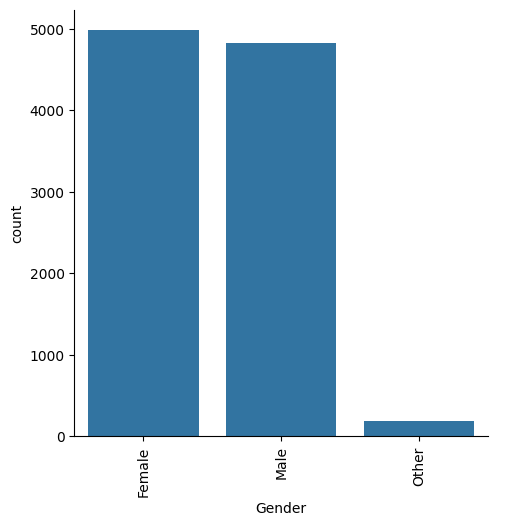

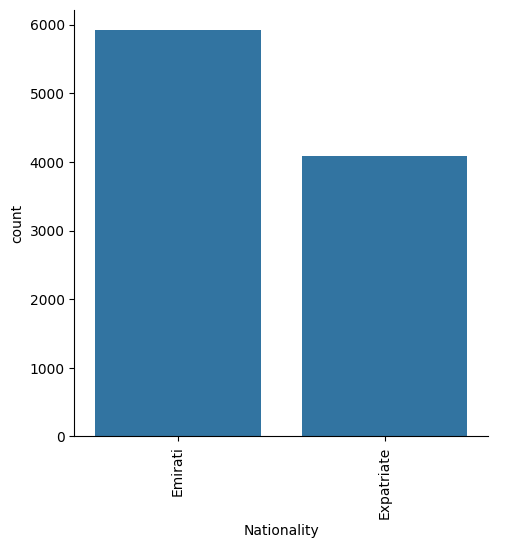

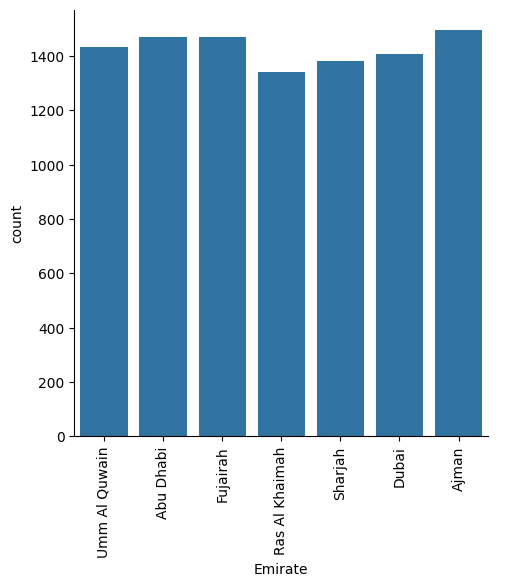

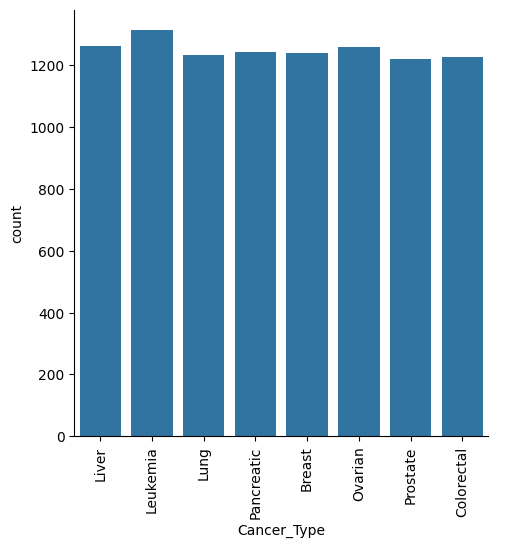

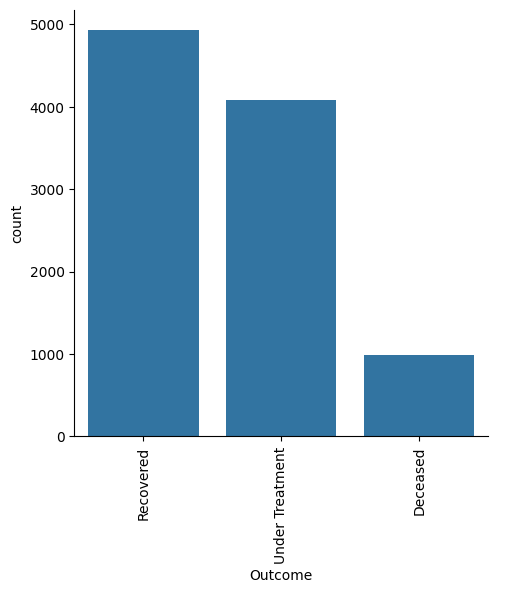

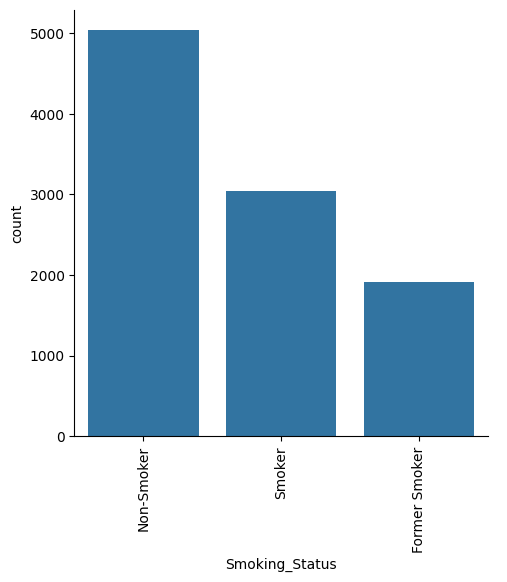

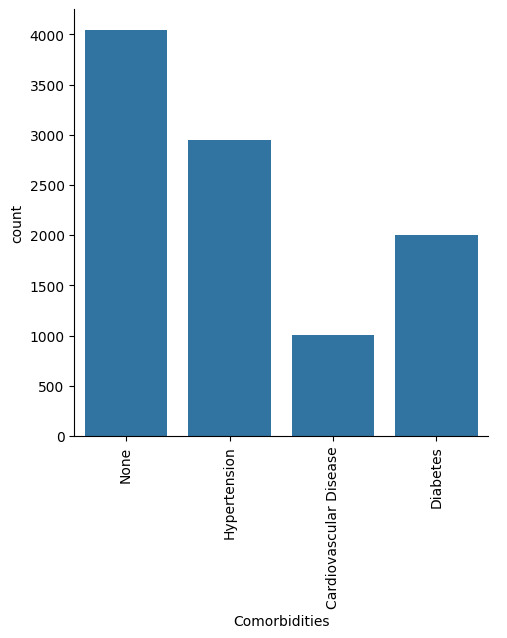

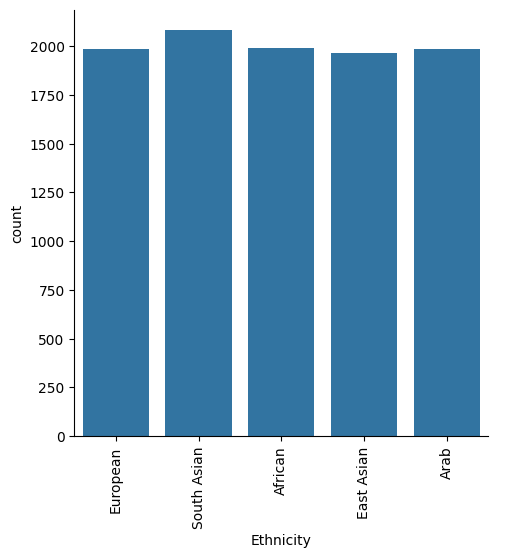

In [67]:
column_list = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Outcome', 'Smoking_Status', 'Comorbidities', 'Ethnicity']

def plot_bar_graph():
    for c in column_list:
        g = sns.catplot(x=c, data=cancer_df, kind='count')
        g.set_xticklabels(rotation=90)

        plt.show()

plot_bar_graph()



In [71]:
#Vamos analisar estatísticamente as colunas numéricas 

cancer_df.select_dtypes(include='number').describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


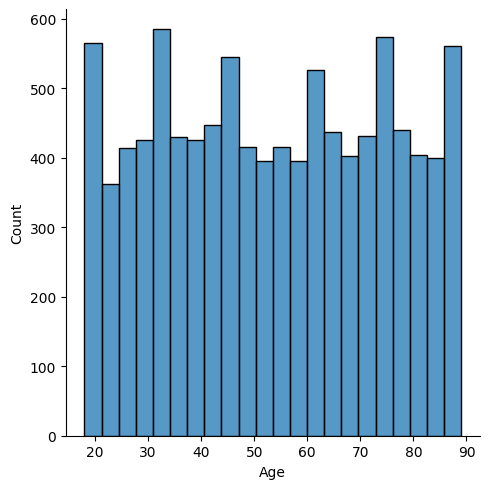

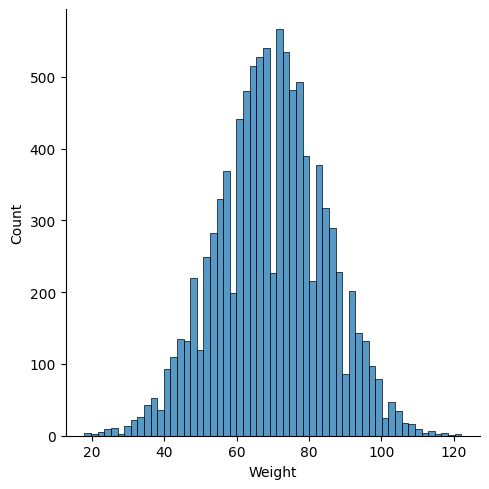

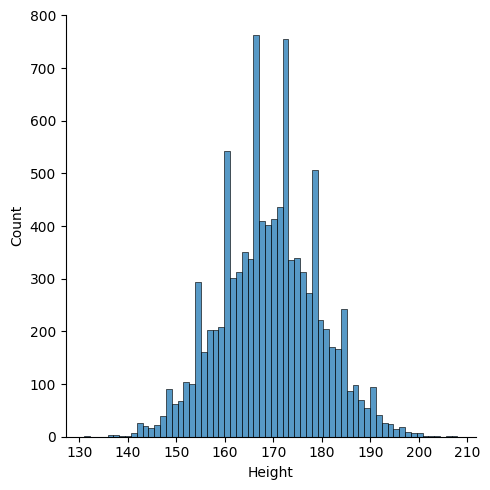

In [72]:
col = ['Age', 'Weight', 'Height']

def plot_bar_graph():
    for c in col:
        sns.displot(cancer_df[c])

        plt.show()

plot_bar_graph()